In [1]:
 %load_ext autoreload
 %autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import urllib
from bs4 import BeautifulSoup
import requests
from astropy.io import fits
from astropy.table import Table
import glob
import scipy.integrate
import scipy.stats
import scipy.interpolate
import scipy.optimize
import scipy.signal
import scipy.ndimage
import scipy.spatial
import seaborn as sns
#---------------- aux files ------------------------
import AuxFunctions as aux
from ProfileClass import PulsarProfile
from WidthMonteCarloClass import WidthDistributionGenerator
from GaussianMixtureModelClass import GaussianMixture

In [3]:
MeerKATfiles = glob.glob('MeerKAT_Profiles/ar_files/*')
MeerKATnames = []
for file in MeerKATfiles:
    MeerKATnames.append(file.split('/')[2].split('_')[0])
MeerKATProfiles = pd.DataFrame({'PSRJ': MeerKATnames, 'file_name': MeerKATfiles})
MeerKATTable = pd.read_csv('MeerKat.csv')
MeerKATTable.set_index('PSRJ', inplace=True)
MeerKATTable.rename(columns={'W10': 'W10_custom'}, inplace=True)

MeerKATProfiles = MeerKATProfiles.set_index('PSRJ')
MeerKATProfiles = MeerKATProfiles.merge(MeerKATTable, how='left', left_index=True, right_index=True)

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

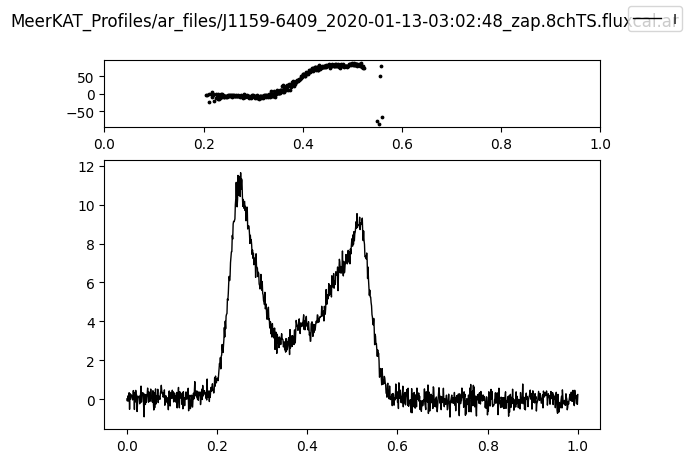

In [137]:
profile = PulsarProfile(MeerKATProfiles.loc['J1159-6409']['file_name'], 'MeerKAT')
profile.plot_profile(plot_fit=False, plot_pol=False, zoom=False)

In [126]:
gm = GaussianMixture(np.linspace(0, 1, profile.Ncounts), profile.I/np.max(profile.I))

In [127]:
gm.add_gaussian_to_mixture_opt()


1


In [81]:
gm.model

[[0.5535847967826154, 0.24271992511496002, 0.008659033486524264],
 [0.5737584679039021, 0.24995228533857008, 0.004004963992825768]]

/Users/arseniy/Documents/Science/Physics/RadioPulsars/PulsarDataBase/AuxFunctions.py:67: RuntimeWarning: overflow encountered in cosh
  return scale * np.exp(-(x - shift)**2 / 2 / disp**2)


(0.2, 0.4)

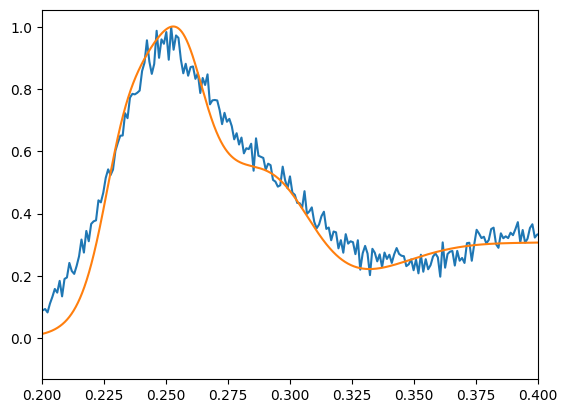

In [143]:
phases = np.linspace(0, 1, 100000)
plt.plot(gm.x_data, gm.y_data)

plt.plot(phases, gm.evaluate(phases))

plt.xlim((0.2, 0.4))

In [146]:
gm = GaussianMixture(np.linspace(0, 1, profile.Ncounts), profile.I/np.max(profile.I))

gm.gaussian_mixture_fit()

1


/Users/arseniy/Documents/Science/Physics/RadioPulsars/PulsarDataBase/AuxFunctions.py:67: RuntimeWarning: overflow encountered in cosh
  return scale * np.exp(-(x - shift)**2 / 2 / disp**2)


[[0.5063529697741138, 0.3768318171423155, 0.12818788573492743]]
2
[[0.8803667154546032, 0.26077674739714113, 0.029115279199514673], [0.691767670435971, 0.48642650005544347, 0.046666968198198794]]
3
[[0.3701757052555239, 0.42261782775388934, 0.05739206051447251], [0.6441516168454476, 0.5106540756637253, 0.022539315139716302], [0.8931901792176908, 0.2575049101010732, 0.024729710516046794]]
4
[[0.6068704512310568, 0.5148322067707793, 0.019055052058862536], [0.4318297339763348, 0.4475213075291294, 0.04691558291032353], [0.7172482288081271, 0.2478875166786143, 0.01583192806723633], [0.4259843512014938, 0.28702379476612644, 0.03255675774567401]]
5
[[0.42279636351527655, 0.2869319171953144, 0.02566192437112392], [0.4369070030629372, 0.46836621637060305, 0.02676813915915461], [0.7740838559100955, 0.2473409252995364, 0.016499663043671016], [0.26138904879223107, 0.388027497213041, 0.03544852181766397], [0.6499936399633778, 0.5185873511007631, 0.017919710044781174]]
6
[[0.6440928771663939, 0.5185

(0.0, 0.8)

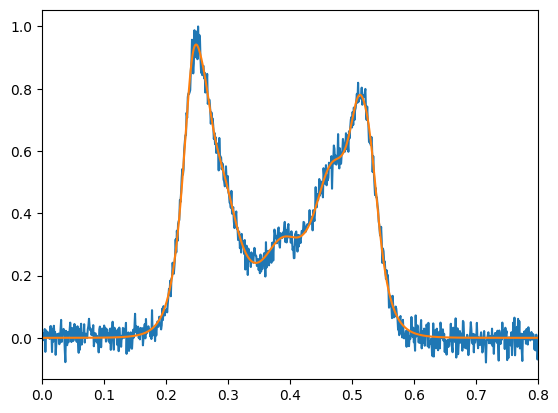

In [148]:
phases = np.linspace(0, 1, 100000)
plt.plot(gm.x_data, gm.y_data)

plt.plot(phases, gm.evaluate(phases))

plt.xlim((0.0, 0.8))

(0.2, 0.3)

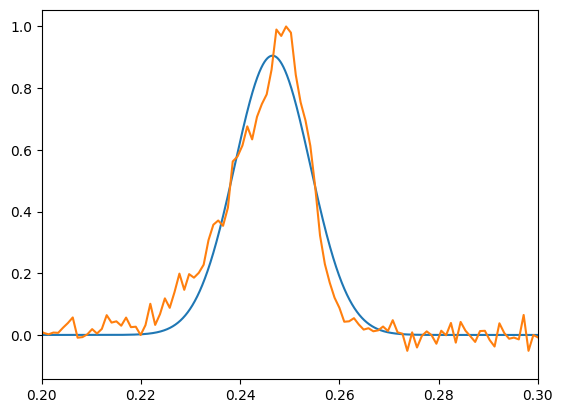

In [99]:
popt, pcov = scipy.optimize.curve_fit(aux.gauss_function, np.linspace(0, 1, profile.Ncounts), profile.I/np.max(profile.I), p0=(1.0, 0.1, 0.2), bounds=((0.0, 0.0, 0.0), (2.0, 1.0, 0.8)))
plt.plot(phases, aux.gauss_function(phases, *popt))
plt.plot(np.linspace(0, 1, profile.Ncounts), profile.I/np.max(profile.I))
plt.xlim((0.2, 0.3))